In [20]:
import pandas as pd
import numpy as np


from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization model
from geneticalgorithm2 import Generation, AlgorithmParams # classes for comfortable parameters setting and getting
from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior
from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want

In [21]:
# Load data into pandas DataFrame
df = pd.read_parquet("dataset/scaled_train_data.parquet")
classes = df["class"].unique()

MO_list = [df[df["class"] == c].mean(axis=0)[:-1].to_numpy() for c in classes ]

In [22]:
#class 0 = sitting, all the others are opposing
parameter_c = .4

def cos_measure(s:np.ndarray,t:np.ndarray):
    return np.dot(s,t)/(np.linalg.norm(s) *np.linalg.norm(t))


def F(s:np.ndarray):
    oppose_avg = 1 - (cos_measure(s,MO_list[1])+cos_measure(s,MO_list[2])+cos_measure(s,MO_list[3])+cos_measure(s,MO_list[4]))/4.
    num = cos_measure(s,MO_list[0]) + parameter_c * oppose_avg
    denom = 1. + parameter_c
    return (num)/denom

def costF(s:np.ndarray):
    return -F(s)

In [23]:
GA_modell = ga(costF,
               dimension=12,
                variable_type=('real'),
                variable_boundaries=[[0.,1.]]*12,
                algorithm_parameters=AlgorithmParams(
                    max_num_iteration = 1000,
                    population_size = 100,
                    mutation_probability = 0.1,
                    #elit_ratio = 0.01,
                    parents_portion = 0.3,
                    crossover_type = Crossover.mixed(alpha=.6),
                    mutation_type = 'uniform_by_center',
                    selection_type = 'roulette',
                    max_iteration_without_improv = None
                    ))


Set: Average time of function evaluating (secs): 0.00017008066177368164 (total = 0.017008066177368164)

Best score before optimization: -1.3749053123478328
____________________ 0.7% GA is running...7 gen from 1000...best value = -1.4922290804256715

                                                                                                                                                                                                        
 The best found solution:
 [-0.08911027 -1.23843975  1.48668325  0.18434375 -0.0303621   0.58802068
  0.23424596 -0.24956754 -0.01329392  1.29756691 -1.08980958 -0.39875212]

 Objective function:
 -1.879833650334584

 Used generations: 1000
 Used time: 21.8 seconds


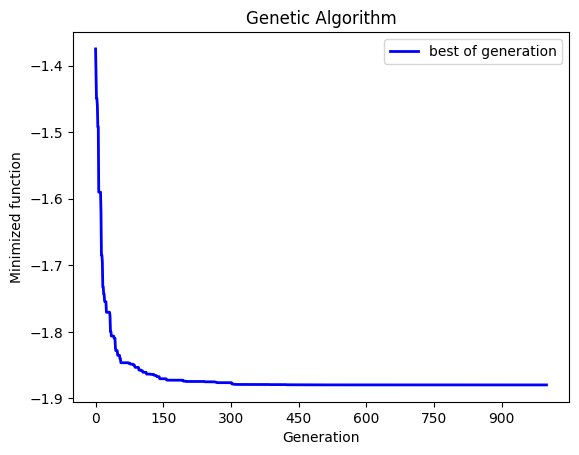

In [24]:
# all of this parameters are default
result = GA_modell.run()

In [30]:
# best solution
print(" best score:",F(result.variable))

for i in range(5):
    print(f"cosine({i}):",cos_measure(result.variable,MO_list[i]))


[-0.08911027 -1.23843975  1.48668325  0.18434375 -0.0303621   0.58802068
  0.23424596 -0.24956754 -0.01329392  1.29756691 -1.08980958 -0.39875212]
1.879833650334584
cosine(0): 0.9955227487838435
cosine(1): -0.48912340354065403
cosine(2): -0.6177779828760405
cosine(3): -0.5446703030421978
cosine(4): -0.71087192738685
[-0.08911027 -1.23843975  1.48668325  0.18434375 -0.0303621   0.58802068
  0.23424596 -0.24956754 -0.01329392  1.29756691 -1.08980958 -0.39875212]
